In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import os 

In [2]:

files_to_read = os.listdir('delta_change_from_cluster')
delta_df = pd.DataFrame(columns=['Name', 'Delta', 'Array'])
index = 0
for i in files_to_read:
    delta = round(float(i.split('eq')[1][1:].replace('_','.')), 3)
    name = 'delta=' + str(delta)
    file = os.path.join('delta_change_from_cluster', i)
    data = pd.read_csv(file)
    delta_df.at[index, 'Name'] = name
    delta_df.at[index, 'Delta'] = delta
    delta_df.at[index, 'Array'] = data[data.columns[0]].to_numpy()
    index +=1
delta_df = delta_df.sort_values('Delta')
delta_df.index = np.arange(len(delta_df))

FileNotFoundError: [Errno 2] No such file or directory: 'delta_change_from_cluster'

In [110]:
delta_df

,Name,Delta,Array
0,delta=0.25,0.25,"[69.156, nan, 50.237, nan, 98.991, nan, nan, n..."
1,delta=0.333,0.333,"[65.129, nan, nan, nan, 52.135, nan, nan, nan,..."
2,delta=0.5,0.5,"[69.987, 44.229, 60.425, 71.929, 63.275, 73.69..."
3,delta=1.0,1.0,"[32.925, 36.249, 38.049, 40.841, 46.735, 38.86..."
4,delta=2.0,2.0,"[17.976, 18.808, 16.254, 16.272000000000002, 1..."
5,delta=3.0,3.0,"[12.495, 10.942, 14.672, 14.029, 15.552, 12.59..."
6,delta=4.0,4.0,"[9.416, 12.607, 8.804, 9.501, 9.4, 10.374, 11...."


In [121]:
labels

[0.25, 0.333, 0.5, 1.0, 2.0, 3.0, 4.0]

[Text(0, 0, '0.25'),
 Text(1, 0, '0.333'),
 Text(2, 0, '0.5'),
 Text(3, 0, '1.0'),
 Text(4, 0, '2.0'),
 Text(5, 0, '3.0'),
 Text(6, 0, '4.0')]

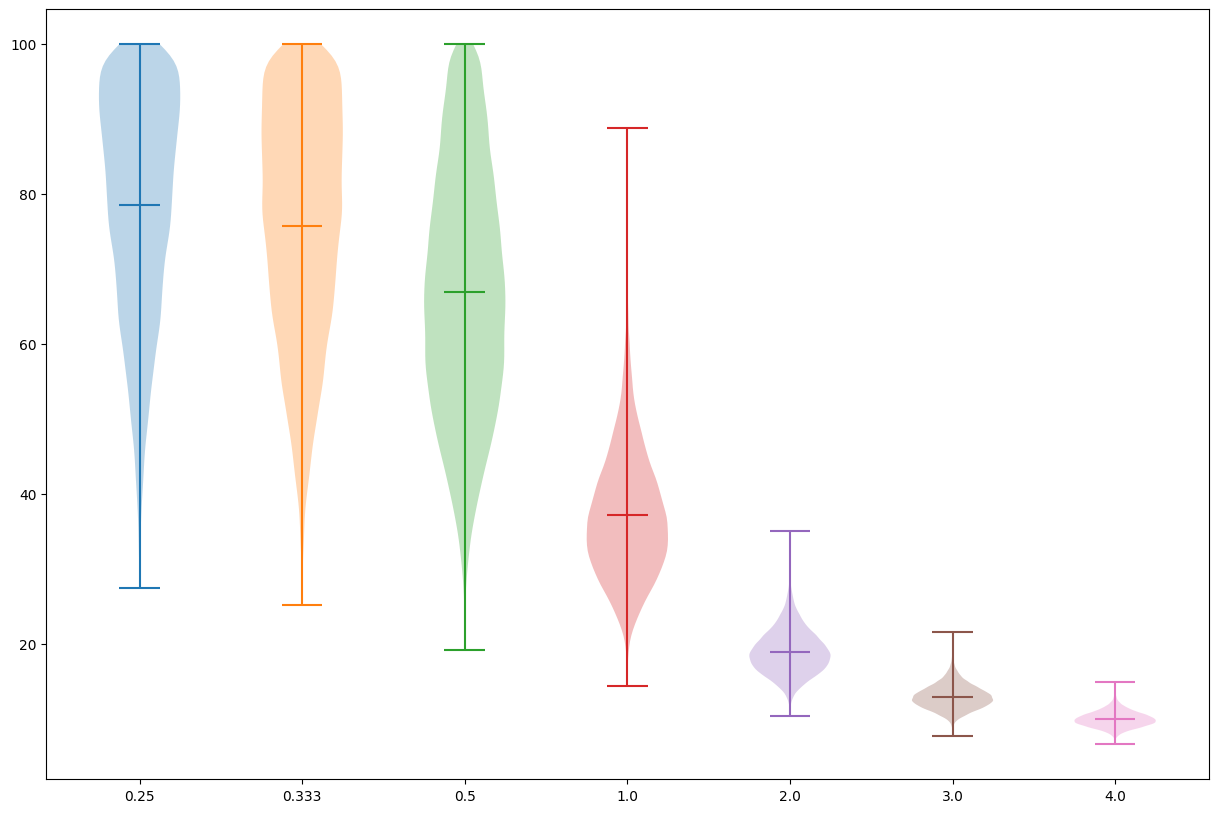

In [124]:
fig, ax = plt.subplots(figsize = (15,10))
labels = []
for i in delta_df.index:
    name = delta_df.at[i, 'Name']
    delta = delta_df.at[i, 'Delta']
    data = delta_df.at[i, 'Array']
    labels.append(delta)
    non_nan = data[~np.isnan(data)]
    ax.violinplot(non_nan, [i], showmeans=True)
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)

In [1]:
from fbm.sim.davies_harte import DaviesHarteFBmGenerator
from fbm.sim.cholesky import CholeskyFBmGenerator

In [4]:
H = 0.5
n_steps = 1000
a = DaviesHarteFBmGenerator().generate_fGn(
            H, size=n_steps) 


array([ 1.80038956e+00,  1.40597414e+00,  7.10965894e-01, -1.16748586e+00,
        3.17333188e-01,  1.77080672e+00,  1.74481472e-01, -9.40264512e-01,
        7.12398512e-01, -8.80225071e-01, -8.52398711e-01, -6.51091078e-01,
       -5.91347936e-01, -6.89967618e-01,  1.09865889e+00,  5.74113012e-01,
        3.06161841e-02,  1.56272867e+00, -1.19698086e-01, -1.69746315e+00,
        1.34782889e+00,  4.21502013e-02, -4.23746144e-01, -1.24968719e+00,
       -1.22264570e+00, -6.59363716e-01, -2.78886710e-01, -1.24126826e-01,
       -1.23833381e+00, -7.15178013e-01,  2.21059594e+00,  2.45998984e-01,
        7.75874522e-01, -6.43555054e-01, -1.60361295e+00,  5.29911682e-01,
        6.40554839e-01, -3.61264962e-01,  7.73593707e-01, -3.94062002e-02,
       -3.71464436e-01,  1.99662859e+00,  2.23967376e+00,  6.37864219e-02,
        7.72374352e-01,  1.96246111e-01,  7.37609757e-01,  3.73388894e-01,
       -6.58281985e-01, -3.65313245e-01, -6.56002270e-01,  1.55469862e+00,
       -8.32829342e-01, -